In [2]:
import numpy as np
import gate_operations as go
import qutip as qt
import random
from functools import reduce

from scipy.sparse import lil_array
from scipy.sparse import csr_matrix
import scipy.sparse

import matplotlib.pyplot as plt

from deutsch_josza_black_box import black_box

def indToState(n, k):
        num = bin(k)[2:].zfill(n)
        return np.array([int(x) for x in str(num)])



# Deutsch-Josza Algorithm

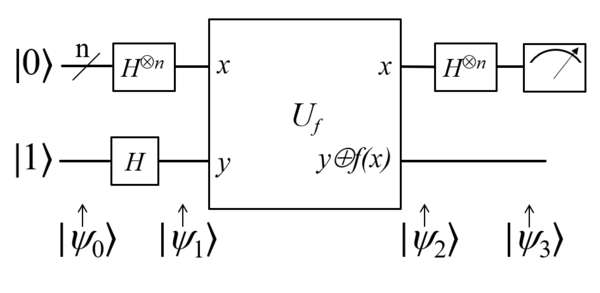
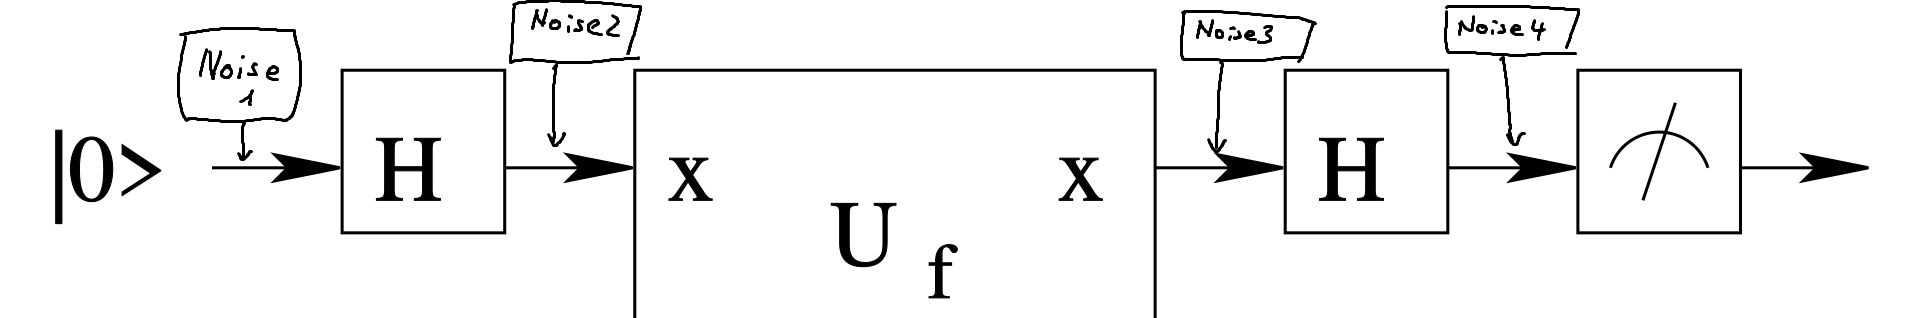

In [6]:
# INPUT SPACE
bits = 3
tests = 1000

noise_1 = "bitflip"
p_1 = 0.1
bit_1 = 1

noise_2 = "phaseflip"
p_2 = 0.1
bit_2 = 1

noise_3 = "ampdamp"
p_3 = 0.1
bit_3 = 1

noise_4 = "ampdamp"
p_4 = 0.1
bit_4 = 3



def noisy_deutsch_josza(bits, tests,noise_1,p_1,bit_1,noise_2,p_2,bit_2,noise_3,p_3,bit_3,noise_4,p_4,bit_4):
    # correct deutsch josza algotithm computation
    correct_solution = go.deutsch_josza(black_box, bits)

    # prepare hadamard instruction
    hadamard_instruction_list = ["H",[]]
    bit = 1
    while bit <= bits:
        hadamard_instruction_list[1].append(bit)
        bit += 1
    hadamard_instuction = go.create_instruction_list([hadamard_instruction_list])

    # NOISY COMPUTATION
    test = 0
    correct_results = 0

    while test < tests:
        # PREPARE STATE
        state = np.zeros((2**bits,))
        state[0] = 1
        state = np.outer(state, state.conj())

        # NOISE SPACE 1
        noise = go.create_instruction_list([[noise_1,p_1,[bit_1]]])
        state = reduce(go.apply_instruction, noise, state)


        # HADAMARD ROUND 1
        state = reduce(go.apply_instruction, hadamard_instuction, state).T

        # NOISE SPACE 2
        noise = go.create_instruction_list([[noise_2,p_2,[bit_2]]])
        state = reduce(go.apply_instruction, noise, state)


        # ORACLE
        row = 0
        col = 0
        while row < state.shape[1]:
            col = 0
            while col < state.shape[0]:
                state[col,row] = state[col,row]*(-1)**black_box(indToState(bits, row))
                state[col,row] = state[col,row]*(-1)**black_box(indToState(bits, col))
                
                col += 1
            row += 1

        # NOISE SPACE 3
        noise = go.create_instruction_list([[noise_3,p_3,[bit_3]]])
        state = reduce(go.apply_instruction, noise, state)


        # HADAMARD ROUND 2
        state = reduce(go.apply_instruction, hadamard_instuction, state).T

        # NOISE SPACE 4
        noise = go.create_instruction_list([[noise_4,p_4,[bit_4]]])
        state = reduce(go.apply_instruction, noise, state)

        # MESUREMENT
        measurements = go.measure_computational(state,bits,1, False)
            
        key = ""
        bit = 1
        while bit <= bits:
            key += "0"
            bit += 1
            
        noisy_solution = measurements[key]

        if noisy_solution == correct_solution:
            correct_results += 1 

        test += 1

    correctness = correct_results / tests

    return correctness

print("Correctness probability: " + str(noisy_deutsch_josza(bits, tests,noise_1,p_1,bit_1,noise_2,p_2,bit_2,noise_3,p_3,bit_3,noise_4,p_4,bit_4) * 100) + " %")


Correctness probability: 78.7 %


# 2 Bits (balanced)

## Single Bitflip (Bit 1)

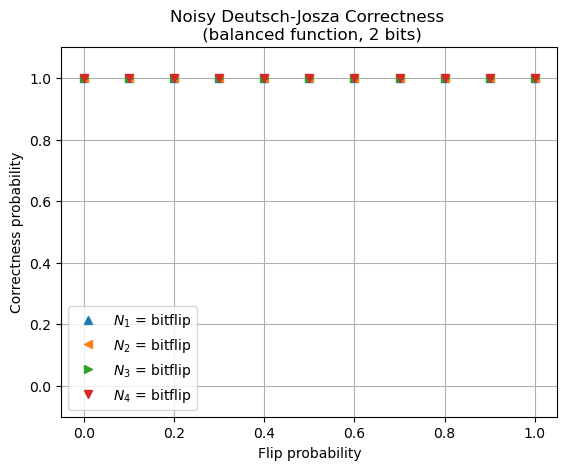

In [63]:
# Parameters for the function
bits = 2
tests = 500

noise_1 = "bitflip"
p_1 = 0
bit_1 = 1

noise_2 = "bitflip"
p_2 = 0
bit_2 = 1

noise_3 = "bitflip"
p_3 = 0
bit_3 = 1

noise_4 = "bitflip"
p_4 = 0
bit_4 = 1

p_values = np.arange(0, 1.1, 0.1)
means = []
means2 = []
means3 = []
means4 = []

for p_1 in p_values:
    means.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_1 = 0

for p_2 in p_values:
    means2.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_2 = 0

for p_3 in p_values:
    means3.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_3 = 0

for p_4 in p_values:
    means4.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

label = "$N_1$ = bitflip" 
label2 = "$N_2$ = bitflip" 
label3 = "$N_3$ = bitflip" 
label4 = "$N_4$ = bitflip" 

#Plotting
plt.errorbar(p_values, means, fmt='^', capsize=3, label=label)
plt.errorbar(p_values, means2, fmt='<', capsize=3, label=label2)
plt.errorbar(p_values, means3, fmt='>', capsize=3, label=label3)
plt.errorbar(p_values, means4, fmt='v', capsize=3, label=label4)
plt.xlabel('Flip probability')
plt.ylabel('Correctness probability')
plt.title('Noisy Deutsch-Josza Correctness \n (balanced function, 2 bits)')
plt.legend()
plt.grid(True)

# Set y-axis range from 0 to 1
plt.ylim(-0.1, 1.1)

# Save the plot
plt.savefig("single_bitflip.svg", format="svg") 

plt.show()


## Single Phaseflip (Bit 1)

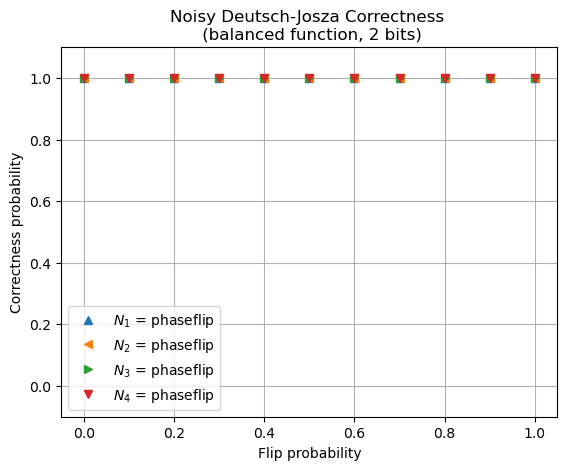

In [64]:
# Parameters for the function
bits = 2
tests = 500

noise_1 = "phaseflip"
p_1 = 0
bit_1 = 1

noise_2 = "phaseflip"
p_2 = 0
bit_2 = 1

noise_3 = "phaseflip"
p_3 = 0
bit_3 = 1

noise_4 = "phaseflip"
p_4 = 0
bit_4 = 1

p_values = np.arange(0, 1.1, 0.1)
means = []
means2 = []
means3 = []
means4 = []

for p_1 in p_values:
    means.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_1 = 0

for p_2 in p_values:
    means2.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_2 = 0

for p_3 in p_values:
    means3.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_3 = 0

for p_4 in p_values:
    means4.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

label = "$N_1$ = phaseflip" 
label2 = "$N_2$ = phaseflip" 
label3 = "$N_3$ = phaseflip" 
label4 = "$N_4$ = phaseflip" 

#Plotting
plt.errorbar(p_values, means, fmt='^', capsize=3, label=label)
plt.errorbar(p_values, means2, fmt='<', capsize=3, label=label2)
plt.errorbar(p_values, means3, fmt='>', capsize=3, label=label3)
plt.errorbar(p_values, means4, fmt='v', capsize=3, label=label4)
plt.xlabel('Flip probability')
plt.ylabel('Correctness probability')
plt.title('Noisy Deutsch-Josza Correctness \n (balanced function, 2 bits)')
plt.legend()
plt.grid(True)

# Set y-axis range from 0 to 1
plt.ylim(-0.1, 1.1)

# Save the plot
plt.savefig("single_phaseflip.svg", format="svg") 

plt.show()


## Single Amplitude Damping (Bit 1)

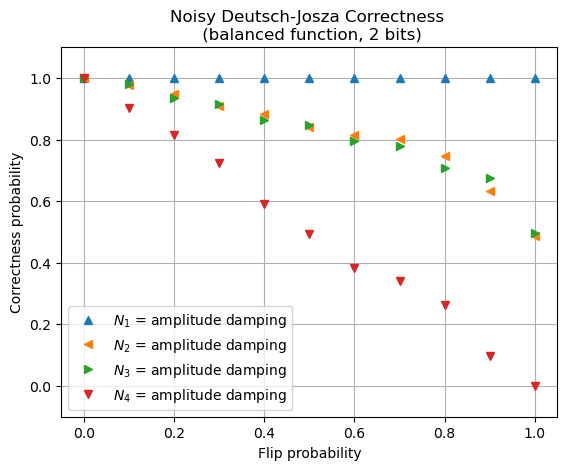

In [ ]:
# Parameters for the function
bits = 2
tests = 500

noise_1 = "ampdamp"
p_1 = 0
bit_1 = 2

noise_2 = "ampdamp"
p_2 = 0
bit_2 = 2

noise_3 = "ampdamp"
p_3 = 0
bit_3 = 2

noise_4 = "ampdamp"
p_4 = 0
bit_4 = 2

p_values = np.arange(0, 1.1, 0.1)
means = []
means2 = []
means3 = []
means4 = []

for p_1 in p_values:
    means.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_1 = 0

for p_2 in p_values:
    means2.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_2 = 0

for p_3 in p_values:
    means3.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_3 = 0

for p_4 in p_values:
    means4.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

label = "$N_1$ = amplitude damping" 
label2 = "$N_2$ = amplitude damping" 
label3 = "$N_3$ = amplitude damping" 
label4 = "$N_4$ = amplitude damping" 

#Plotting
plt.errorbar(p_values, means, fmt='^', capsize=3, label=label)
plt.errorbar(p_values, means2, fmt='<', capsize=3, label=label2)
plt.errorbar(p_values, means3, fmt='>', capsize=3, label=label3)
plt.errorbar(p_values, means4, fmt='v', capsize=3, label=label4)
plt.xlabel('Flip probability')
plt.ylabel('Correctness probability')
plt.title('Noisy Deutsch-Josza Correctness \n (balanced function, 2 bits)')
plt.legend()
plt.grid(True)

# Set y-axis range from 0 to 1
plt.ylim(-0.1, 1.1)

# Save the plot
plt.savefig("single_ampdamp.svg", format="svg") 

plt.show()


## Single Bitflip (Bit 2)

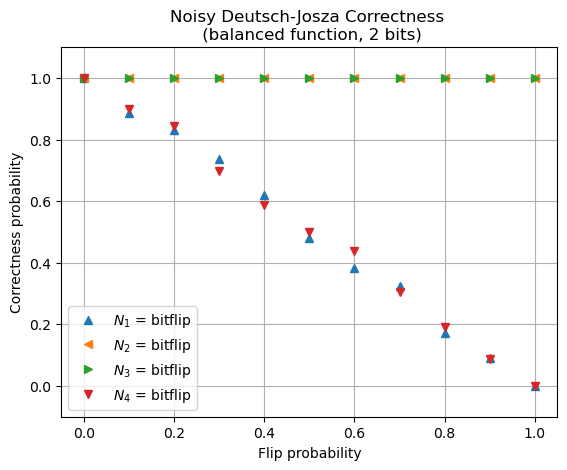

In [ ]:
# Parameters for the function
bits = 2
tests = 500

noise_1 = "bitflip"
p_1 = 0
bit_1 = 2

noise_2 = "bitflip"
p_2 = 0
bit_2 = 2

noise_3 = "bitflip"
p_3 = 0
bit_3 = 2

noise_4 = "bitflip"
p_4 = 0
bit_4 = 2

p_values = np.arange(0, 1.1, 0.1)
means = []
means2 = []
means3 = []
means4 = []

for p_1 in p_values:
    means.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_1 = 0

for p_2 in p_values:
    means2.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_2 = 0

for p_3 in p_values:
    means3.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_3 = 0

for p_4 in p_values:
    means4.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

label = "$N_1$ = bitflip" 
label2 = "$N_2$ = bitflip" 
label3 = "$N_3$ = bitflip" 
label4 = "$N_4$ = bitflip" 

#Plotting
plt.errorbar(p_values, means, fmt='^', capsize=3, label=label)
plt.errorbar(p_values, means2, fmt='<', capsize=3, label=label2)
plt.errorbar(p_values, means3, fmt='>', capsize=3, label=label3)
plt.errorbar(p_values, means4, fmt='v', capsize=3, label=label4)
plt.xlabel('Flip probability')
plt.ylabel('Correctness probability')
plt.title('Noisy Deutsch-Josza Correctness \n (balanced function, 2 bits)')
plt.legend()
plt.grid(True)

# Set y-axis range from 0 to 1
plt.ylim(-0.1, 1.1)

# Save the plot
plt.savefig("single_bitflip2.svg", format="svg") 

plt.show()


## Single Phaseflip (Bit 2)

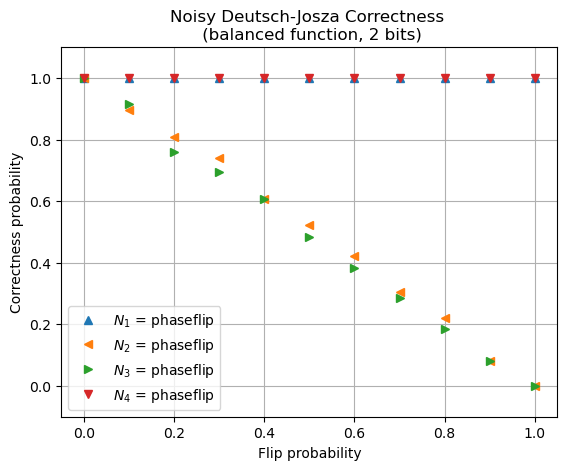

In [67]:
# Parameters for the function
bits = 2
tests = 500

noise_1 = "phaseflip"
p_1 = 0
bit_1 = 2

noise_2 = "phaseflip"
p_2 = 0
bit_2 = 2

noise_3 = "phaseflip"
p_3 = 0
bit_3 = 2

noise_4 = "phaseflip"
p_4 = 0
bit_4 = 2

p_values = np.arange(0, 1.1, 0.1)
means = []
means2 = []
means3 = []
means4 = []

for p_1 in p_values:
    means.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_1 = 0

for p_2 in p_values:
    means2.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_2 = 0

for p_3 in p_values:
    means3.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_3 = 0

for p_4 in p_values:
    means4.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

label = "$N_1$ = phaseflip" 
label2 = "$N_2$ = phaseflip" 
label3 = "$N_3$ = phaseflip" 
label4 = "$N_4$ = phaseflip" 

#Plotting
plt.errorbar(p_values, means, fmt='^', capsize=3, label=label)
plt.errorbar(p_values, means2, fmt='<', capsize=3, label=label2)
plt.errorbar(p_values, means3, fmt='>', capsize=3, label=label3)
plt.errorbar(p_values, means4, fmt='v', capsize=3, label=label4)
plt.xlabel('Flip probability')
plt.ylabel('Correctness probability')
plt.title('Noisy Deutsch-Josza Correctness \n (balanced function, 2 bits)')
plt.legend()
plt.grid(True)

# Set y-axis range from 0 to 1
plt.ylim(-0.1, 1.1)

# Save the plot
plt.savefig("single_phaseflip2.svg", format="svg") 

plt.show()


## Single Amplitude Damping (Bit 2)

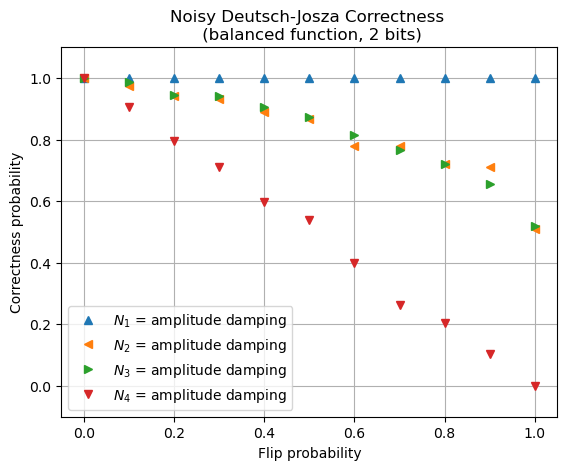

In [ ]:
# Parameters for the function
bits = 2
tests = 500

noise_1 = "ampdamp"
p_1 = 0
bit_1 = 2

noise_2 = "ampdamp"
p_2 = 0
bit_2 = 2

noise_3 = "ampdamp"
p_3 = 0
bit_3 = 2

noise_4 = "ampdamp"
p_4 = 0
bit_4 = 2

p_values = np.arange(0, 1.1, 0.1)
means = []
means2 = []
means3 = []
means4 = []

for p_1 in p_values:
    means.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_1 = 0

for p_2 in p_values:
    means2.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_2 = 0

for p_3 in p_values:
    means3.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_3 = 0

for p_4 in p_values:
    means4.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

label = "$N_1$ = amplitude damping" 
label2 = "$N_2$ = amplitude damping" 
label3 = "$N_3$ = amplitude damping" 
label4 = "$N_4$ = amplitude damping" 

#Plotting
plt.errorbar(p_values, means, fmt='^', capsize=3, label=label)
plt.errorbar(p_values, means2, fmt='<', capsize=3, label=label2)
plt.errorbar(p_values, means3, fmt='>', capsize=3, label=label3)
plt.errorbar(p_values, means4, fmt='v', capsize=3, label=label4)
plt.xlabel('Flip probability')
plt.ylabel('Correctness probability')
plt.title('Noisy Deutsch-Josza Correctness \n (balanced function, 2 bits)')
plt.legend()
plt.grid(True)

# Set y-axis range from 0 to 1
plt.ylim(-0.1, 1.1)

# Save the plot
plt.savefig("single_ampdamp2.svg", format="svg") 

plt.show()


# 3 Bits (constant)

## Single Bitflip (Bit 1)

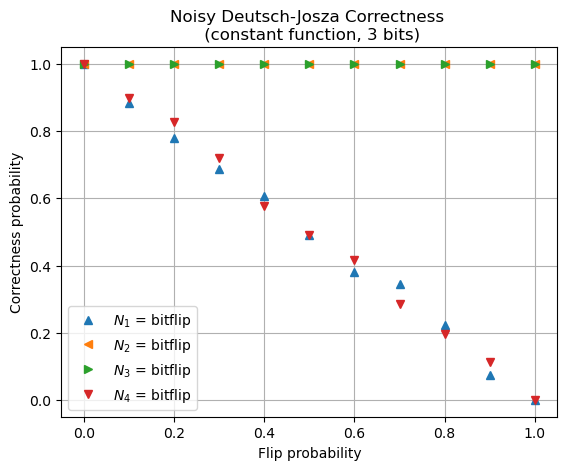

In [51]:
# Parameters for the function
bits = 3
tests = 500

noise_1 = "bitflip"
p_1 = 0
bit_1 = 1

noise_2 = "bitflip"
p_2 = 0
bit_2 = 1

noise_3 = "bitflip"
p_3 = 0
bit_3 = 1

noise_4 = "bitflip"
p_4 = 0
bit_4 = 1

p_values = np.arange(0, 1.1, 0.1)
means = []
means2 = []
means3 = []
means4 = []

for p_1 in p_values:
    means.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_1 = 0

for p_2 in p_values:
    means2.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_2 = 0

for p_3 in p_values:
    means3.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_3 = 0

for p_4 in p_values:
    means4.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

label = "$N_1$ = bitflip" 
label2 = "$N_2$ = bitflip" 
label3 = "$N_3$ = bitflip" 
label4 = "$N_4$ = bitflip" 

#Plotting
plt.errorbar(p_values, means, fmt='^', capsize=3, label=label)
plt.errorbar(p_values, means2, fmt='<', capsize=3, label=label2)
plt.errorbar(p_values, means3, fmt='>', capsize=3, label=label3)
plt.errorbar(p_values, means4, fmt='v', capsize=3, label=label4)
plt.xlabel('Flip probability')
plt.ylabel('Correctness probability')
plt.title('Noisy Deutsch-Josza Correctness \n (constant function, 3 bits)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("single_bitflip.svg", format="svg") 

plt.show()


## Single Phaseflip (Bit 1)

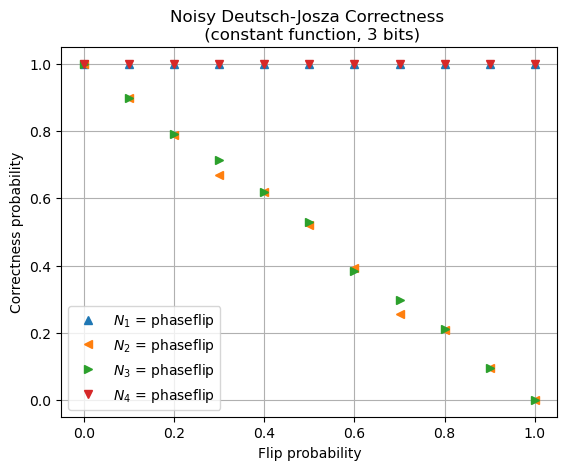

In [52]:
# Parameters for the function
bits = 3
tests = 500

noise_1 = "phaseflip"
p_1 = 0
bit_1 = 1

noise_2 = "phaseflip"
p_2 = 0
bit_2 = 1

noise_3 = "phaseflip"
p_3 = 0
bit_3 = 1

noise_4 = "phaseflip"
p_4 = 0
bit_4 = 1

p_values = np.arange(0, 1.1, 0.1)
means = []
means2 = []
means3 = []
means4 = []

for p_1 in p_values:
    means.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_1 = 0

for p_2 in p_values:
    means2.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_2 = 0

for p_3 in p_values:
    means3.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_3 = 0

for p_4 in p_values:
    means4.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

label = "$N_1$ = phaseflip" 
label2 = "$N_2$ = phaseflip" 
label3 = "$N_3$ = phaseflip" 
label4 = "$N_4$ = phaseflip" 

#Plotting
plt.errorbar(p_values, means, fmt='^', capsize=3, label=label)
plt.errorbar(p_values, means2, fmt='<', capsize=3, label=label2)
plt.errorbar(p_values, means3, fmt='>', capsize=3, label=label3)
plt.errorbar(p_values, means4, fmt='v', capsize=3, label=label4)
plt.xlabel('Flip probability')
plt.ylabel('Correctness probability')
plt.title('Noisy Deutsch-Josza Correctness \n (constant function, 3 bits)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("single_phaseflip.svg", format="svg") 

plt.show()


## Single Amplitude Damping (Bit 1)

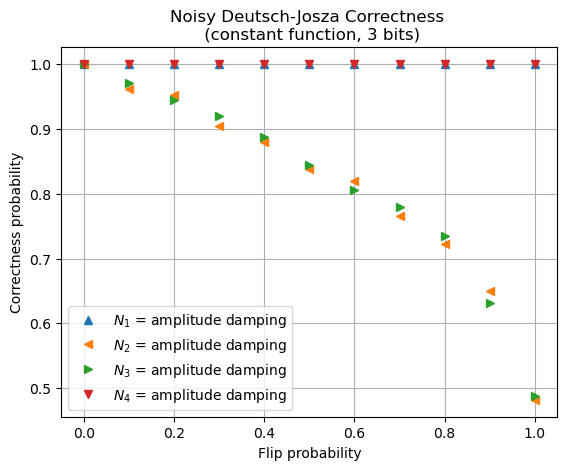

In [ ]:
# Parameters for the function
bits = 3
tests = 500

noise_1 = "ampdamp"
p_1 = 0
bit_1 = 2

noise_2 = "ampdamp"
p_2 = 0
bit_2 = 2

noise_3 = "ampdamp"
p_3 = 0
bit_3 = 2

noise_4 = "ampdamp"
p_4 = 0
bit_4 = 2

p_values = np.arange(0, 1.1, 0.1)
means = []
means2 = []
means3 = []
means4 = []

for p_1 in p_values:
    means.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_1 = 0

for p_2 in p_values:
    means2.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_2 = 0

for p_3 in p_values:
    means3.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_3 = 0

for p_4 in p_values:
    means4.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

label = "$N_1$ = amplitude damping" 
label2 = "$N_2$ = amplitude damping" 
label3 = "$N_3$ = amplitude damping" 
label4 = "$N_4$ = amplitude damping" 

#Plotting
plt.errorbar(p_values, means, fmt='^', capsize=3, label=label)
plt.errorbar(p_values, means2, fmt='<', capsize=3, label=label2)
plt.errorbar(p_values, means3, fmt='>', capsize=3, label=label3)
plt.errorbar(p_values, means4, fmt='v', capsize=3, label=label4)
plt.xlabel('Flip probability')
plt.ylabel('Correctness probability')
plt.title('Noisy Deutsch-Josza Correctness \n (constant function, 3 bits)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("single_ampdamp.svg", format="svg") 

plt.show()


## Single Bitflip (Bit 2)

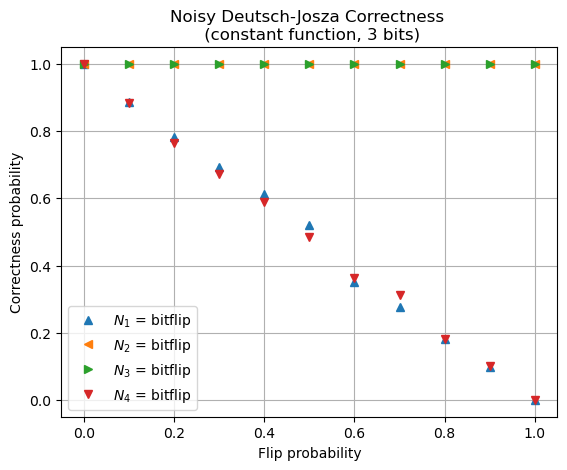

In [54]:
# Parameters for the function
bits = 3
tests = 500

noise_1 = "bitflip"
p_1 = 0
bit_1 = 2

noise_2 = "bitflip"
p_2 = 0
bit_2 = 2

noise_3 = "bitflip"
p_3 = 0
bit_3 = 2

noise_4 = "bitflip"
p_4 = 0
bit_4 = 2

p_values = np.arange(0, 1.1, 0.1)
means = []
means2 = []
means3 = []
means4 = []

for p_1 in p_values:
    means.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_1 = 0

for p_2 in p_values:
    means2.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_2 = 0

for p_3 in p_values:
    means3.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_3 = 0

for p_4 in p_values:
    means4.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

label = "$N_1$ = bitflip" 
label2 = "$N_2$ = bitflip" 
label3 = "$N_3$ = bitflip" 
label4 = "$N_4$ = bitflip" 

#Plotting
plt.errorbar(p_values, means, fmt='^', capsize=3, label=label)
plt.errorbar(p_values, means2, fmt='<', capsize=3, label=label2)
plt.errorbar(p_values, means3, fmt='>', capsize=3, label=label3)
plt.errorbar(p_values, means4, fmt='v', capsize=3, label=label4)
plt.xlabel('Flip probability')
plt.ylabel('Correctness probability')
plt.title('Noisy Deutsch-Josza Correctness \n (constant function, 3 bits)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("single_bitflip.svg", format="svg") 

plt.show()


## Single Phaseflip (Bit 2)

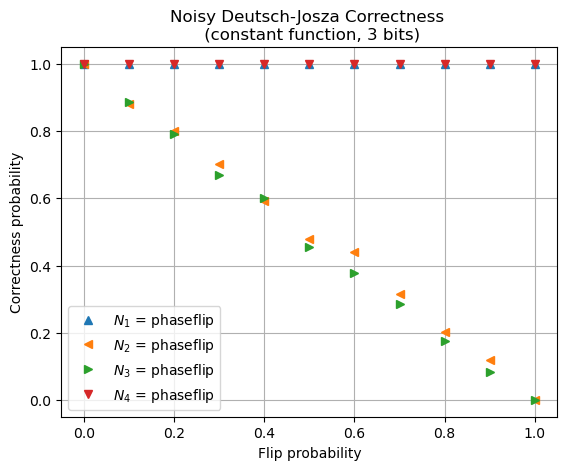

In [55]:
# Parameters for the function
bits = 3
tests = 500

noise_1 = "phaseflip"
p_1 = 0
bit_1 = 2

noise_2 = "phaseflip"
p_2 = 0
bit_2 = 2

noise_3 = "phaseflip"
p_3 = 0
bit_3 = 2

noise_4 = "phaseflip"
p_4 = 0
bit_4 = 2

p_values = np.arange(0, 1.1, 0.1)
means = []
means2 = []
means3 = []
means4 = []

for p_1 in p_values:
    means.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_1 = 0

for p_2 in p_values:
    means2.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_2 = 0

for p_3 in p_values:
    means3.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_3 = 0

for p_4 in p_values:
    means4.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

label = "$N_1$ = phaseflip" 
label2 = "$N_2$ = phaseflip" 
label3 = "$N_3$ = phaseflip" 
label4 = "$N_4$ = phaseflip" 

#Plotting
plt.errorbar(p_values, means, fmt='^', capsize=3, label=label)
plt.errorbar(p_values, means2, fmt='<', capsize=3, label=label2)
plt.errorbar(p_values, means3, fmt='>', capsize=3, label=label3)
plt.errorbar(p_values, means4, fmt='v', capsize=3, label=label4)
plt.xlabel('Flip probability')
plt.ylabel('Correctness probability')
plt.title('Noisy Deutsch-Josza Correctness \n (constant function, 3 bits)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("single_phaseflip.svg", format="svg") 

plt.show()


## Single Amplitude Damping (Bit 2)

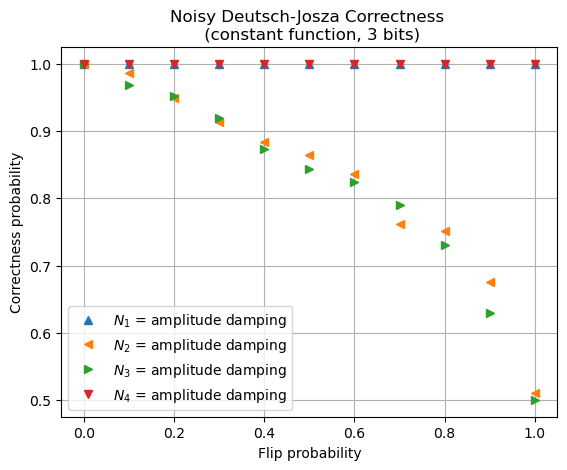

In [56]:
# Parameters for the function
bits = 3
tests = 500

noise_1 = "ampdamp"
p_1 = 0
bit_1 = 2

noise_2 = "ampdamp"
p_2 = 0
bit_2 = 2

noise_3 = "ampdamp"
p_3 = 0
bit_3 = 2

noise_4 = "ampdamp"
p_4 = 0
bit_4 = 2

p_values = np.arange(0, 1.1, 0.1)
means = []
means2 = []
means3 = []
means4 = []

for p_1 in p_values:
    means.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_1 = 0

for p_2 in p_values:
    means2.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_2 = 0

for p_3 in p_values:
    means3.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

p_3 = 0

for p_4 in p_values:
    means4.append(np.mean(noisy_deutsch_josza(bits, tests, noise_1, p_1, bit_1,
                                   noise_2, p_2, bit_2,
                                   noise_3, p_3, bit_3,
                                   noise_4, p_4, bit_4)))

label = "$N_1$ = amplitude damping" 
label2 = "$N_2$ = amplitude damping" 
label3 = "$N_3$ = amplitude damping" 
label4 = "$N_4$ = amplitude damping" 

#Plotting
plt.errorbar(p_values, means, fmt='^', capsize=3, label=label)
plt.errorbar(p_values, means2, fmt='<', capsize=3, label=label2)
plt.errorbar(p_values, means3, fmt='>', capsize=3, label=label3)
plt.errorbar(p_values, means4, fmt='v', capsize=3, label=label4)
plt.xlabel('Flip probability')
plt.ylabel('Correctness probability')
plt.title('Noisy Deutsch-Josza Correctness \n (constant function, 3 bits)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("single_ampdamp.svg", format="svg") 

plt.show()
